In [1]:
from keras import backend as k

In [2]:
k.clear_session()

In [3]:
import tensorflow as tf
import os, shutil
import numpy as np
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, BatchNormalization, Lambda
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
original_dataset_dir = '/content/drive/MyDrive/radiografia'
train_dir = "/content/drive/MyDrive/radiografia/chest_x_ray/train"
validation_images = '/content/drive/MyDrive/radiografia/chest_x_ray/validation'
test_dir = '/content/drive/MyDrive/radiografia/chest_x_ray/test'

In [ ]:
test_dir = '/content/drive/MyDrive/radiografia/chest_x_ray/test'
os.mkdir(test_dir)

In [ ]:
os.makedirs('/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL', exist_ok=True) 
os.makedirs('/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA', exist_ok=True) 

In [6]:
test_normal = '/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL'
test_pneumonia = '/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA'

In [7]:
t_normal = "/content/drive/MyDrive/radiografia/chest_x_ray/train/NORMAL"
t_pneumonia = "/content/drive/MyDrive/radiografia/chest_x_ray/train/PNEUMONIA"

In [ ]:
filenames = os.listdir(t_normal)
for filename  in filenames[:10]:
  src = os.path.join(t_normal, filename)
  dst = os.path.join(test_normal, filename)
  shutil.move(src, dst)

filenames = os.listdir(t_pneumonia)
for filename  in filenames[:10]:
  src = os.path.join(t_pneumonia, filename)
  dst = os.path.join(test_pneumonia, filename)
  shutil.move(src, dst)

In [ ]:
print('total t_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/train/NORMAL")))
print('total t_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/train/PNEUMONIA")))
print('total v_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/validation/NORMAL")))
print('total v_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/validation/PNEUMONIA")))
print('total test_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL")))
print('total test_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA")))

total t_normal images: 1339
total t_pneumonia images: 3873
total v_normal images: 234
total v_pneumonia images: 390
total test_normal images: 10
total test_pneumonia images: 10


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

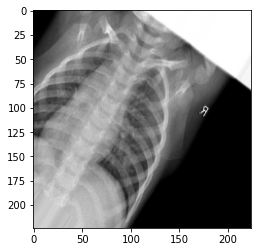

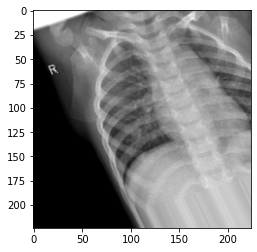

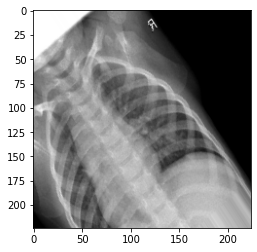

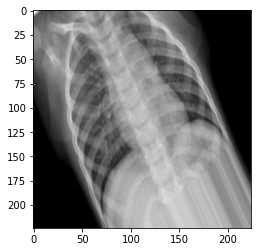

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
import numpy as np
#filenames = os.listdir(t_yeast)
fnames = [os.path.join(t_normal, fname) for
          fname in os.listdir(t_normal)]
img=fnames[2]
#fnames = [os.path.join(train_cats_dir, fname) for
 #         fname in os.listdir(train_cats_dir)]
#img_path = fnames[3]
img = utils.load_img(img, target_size=(224, 224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()  

In [ ]:
filenames = os.listdir(t_normal)

In [ ]:
filenames [1]

'IM-0536-0001.jpeg'

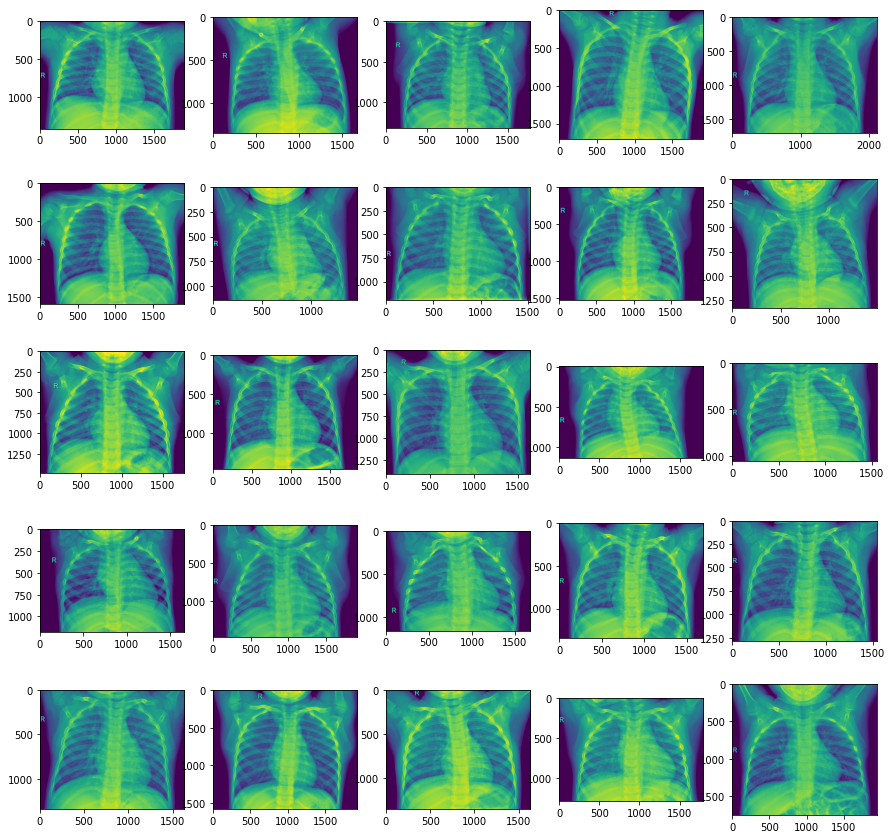

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
plt.figure(figsize=(15,15))
#TAMANO_IMG=100
#fnames = [os.path.join(t_yeast, fname) for
      #    fname in os.listdir(t_yeast)]
#img_path = fnames[3]
#img = utils.load_img(img_path, target_size=(150, 150))

for i, nombreimg in enumerate(filenames[:25]):
  plt.subplot(5,5,i+1)

  imagen = mpimg.imread(t_normal + '/' + nombreimg)

  plt.imshow(imagen)

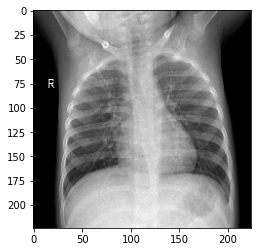

In [ ]:
from tensorflow.keras import utils
img_path = fnames[1]
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = utils.load_img(img_path, target_size=(224, 224))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary")

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_images,
    target_size=(224,224),
    batch_size=32,
    class_mode = "binary")

Found 5212 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary")

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = validation_datagen.flow_from_directory(
    validation_images,
    target_size=(224,224),
    batch_size=32,
    class_mode = "binary")

Found 5212 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),  strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))

model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.legacy.RMSprop(learning_rate=0.0005), 
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data= validation_generator
    )

Epoch 1/20
163/163 [==============================] - 1802s 10s/step - loss: 0.7251 - accuracy: 0.7976 - val_loss: 0.7631 - val_accuracy: 0.7212
Epoch 2/20
163/163 [==============================] - 1456s 9s/step - loss: 0.3003 - accuracy: 0.9208 - val_loss: 0.6126 - val_accuracy: 0.7981
Epoch 3/20
163/163 [==============================] - 1437s 9s/step - loss: 0.2055 - accuracy: 0.9520 - val_loss: 0.7929 - val_accuracy: 0.7788
Epoch 4/20
163/163 [==============================] - 1435s 9s/step - loss: 0.1673 - accuracy: 0.9609 - val_loss: 0.7985 - val_accuracy: 0.7965
Epoch 5/20
163/163 [==============================] - 1439s 9s/step - loss: 0.1429 - accuracy: 0.9641 - val_loss: 0.8013 - val_accuracy: 0.7708
Epoch 6/20
163/163 [==============================] - 1436s 9s/step - loss: 0.1229 - accuracy: 0.9714 - val_loss: 0.7333 - val_accuracy: 0.8365
Epoch 7/20
163/163 [==============================] - 1435s 9s/step - loss: 0.1133 - accuracy: 0.9718 - val_loss: 0.9850 - val_accuracy

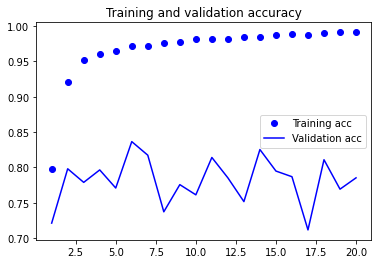

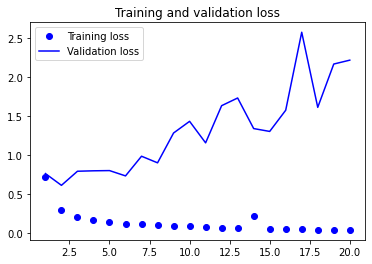

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3, 
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32,
    class_mode="binary") 

validation_generator = validation_datagen.flow_from_directory(
    validation_images, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 5212 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),  strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))

model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.legacy.RMSprop(learning_rate=0.0005), 
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data= validation_generator
    )

Epoch 1/20
163/163 [==============================] - 1287s 7s/step - loss: 0.7725 - accuracy: 0.7371 - val_loss: 0.6902 - val_accuracy: 0.7276
Epoch 2/20
163/163 [==============================] - 130s 797ms/step - loss: 0.5142 - accuracy: 0.7851 - val_loss: 0.6720 - val_accuracy: 0.6522
Epoch 3/20
163/163 [==============================] - 137s 839ms/step - loss: 0.4355 - accuracy: 0.8290 - val_loss: 0.5385 - val_accuracy: 0.7724
Epoch 4/20
163/163 [==============================] - 131s 802ms/step - loss: 0.4087 - accuracy: 0.8383 - val_loss: 0.5749 - val_accuracy: 0.7580
Epoch 5/20
163/163 [==============================] - 132s 810ms/step - loss: 0.3744 - accuracy: 0.8584 - val_loss: 0.7647 - val_accuracy: 0.5897
Epoch 6/20
163/163 [==============================] - 133s 818ms/step - loss: 0.3713 - accuracy: 0.8559 - val_loss: 0.4012 - val_accuracy: 0.8526
Epoch 7/20
163/163 [==============================] - 130s 799ms/step - loss: 0.3537 - accuracy: 0.8655 - val_loss: 0.4007 - v

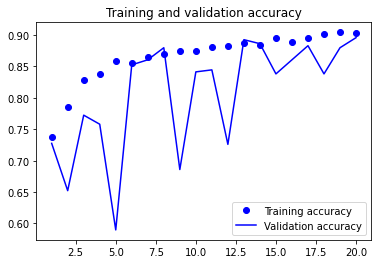

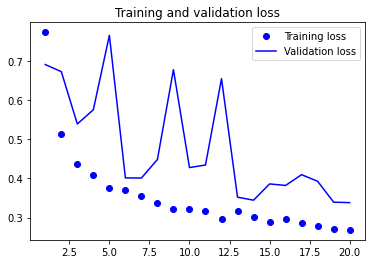

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

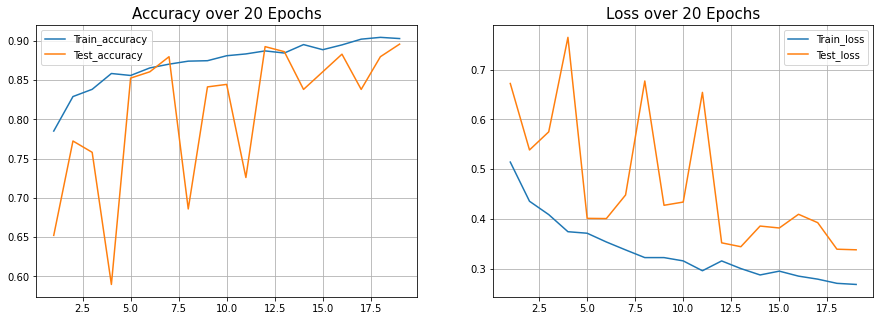

In [17]:
def plot_acc_loss(result, epochs):
 acc = result.history["accuracy"]
 loss = result.history["loss"]
 val_acc = result.history["val_accuracy"]
 val_loss = result.history["val_loss"]
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label="Train_accuracy")
 plt.plot(range(1,epochs), val_acc[1:], label="Test_accuracy")
 plt.title("Accuracy over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label="Train_loss")
 plt.plot(range(1,epochs), val_loss[1:], label="Test_loss")
 plt.title("Loss over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(history, 20)

In [18]:
model.save("/content/drive/MyDrive/radiografia/chest_x_ray/model_1.h")
model.save_weights("/content/drive/MyDrive/radiografia/chest_x_ray/pesos_1.h")

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.


<ipython-input-19-7eaae92923da>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.8999999761581421


In [20]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=(224,224),
 batch_size=32,
 shuffle=False,
 seed=42,
 class_mode="binary")

test_generator.reset()
x = model.evaluate_generator(test_generator,
                             steps = np.ceil(len(test_generator) / 32),
                             use_multiprocessing = False,
                             verbose = 1,
                             workers=1)
print("Test loss:" , x[0])
print("Test accuracy:",x[1])

Found 20 images belonging to 2 classes.


<ipython-input-20-0a82e2e3d8d0>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x = model.evaluate_generator(test_generator,


1/1 [==============================] - 0s 377ms/step - loss: 0.2552 - accuracy: 0.9000
Test loss: 0.25519487261772156
Test accuracy: 0.8999999761581421


In [ ]:
filenames = os.listdir(t_normal)

<ipython-input-27-c8880ff1dcbc>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_generator,1000,verbose=1)


   1/1000 [..............................] - ETA: 5:50

1000/1000 [==============================] - 0s 41us/step
Predictions finished
NORMAL/IM-0511-0001.jpeg


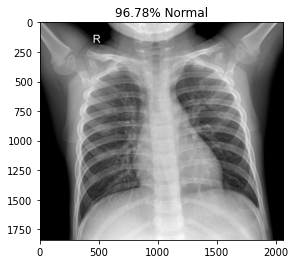

NORMAL/IM-0526-0001.jpeg


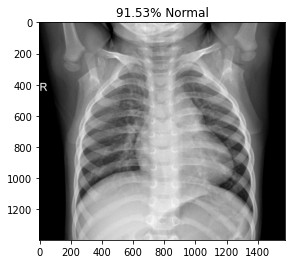

NORMAL/IM-0531-0001.jpeg


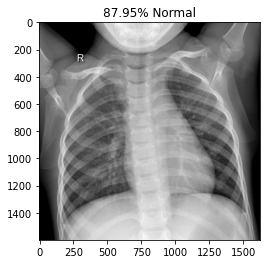

NORMAL/IM-0533-0001.jpeg


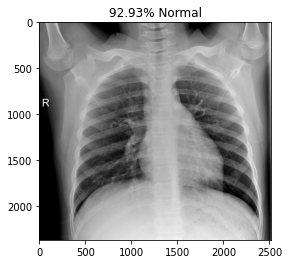

NORMAL/IM-0534-0001.jpeg


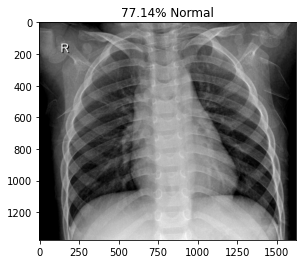

NORMAL/IM-0535-0001.jpeg


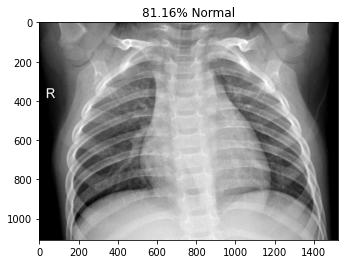

NORMAL/IM-0539-0001.jpeg


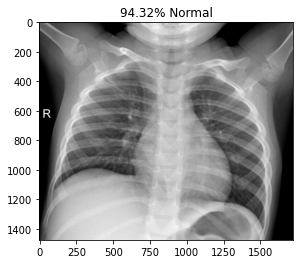

NORMAL/IM-0545-0001-0002.jpeg


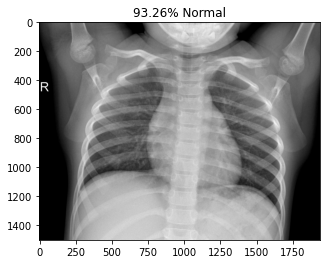

NORMAL/IM-0547-0001.jpeg


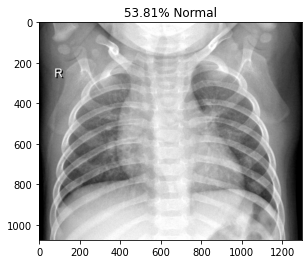

NORMAL/IM-0549-0001.jpeg


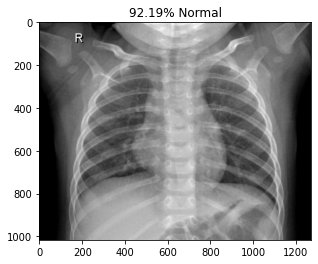

PNEUMONIA/person501_virus_1010.jpeg


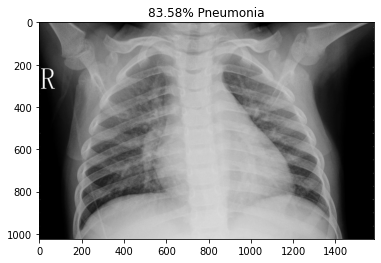

PNEUMONIA/person502_bacteria_2122.jpeg


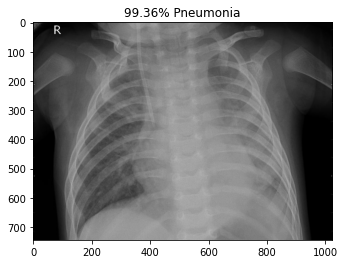

PNEUMONIA/person502_virus_1012.jpeg


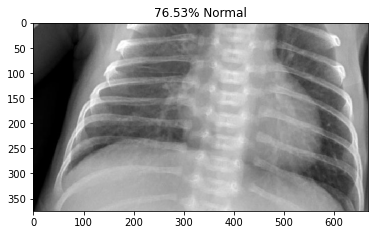

PNEUMONIA/person508_bacteria_2142.jpeg


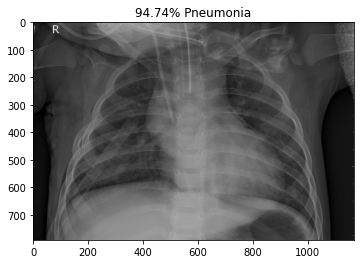

PNEUMONIA/person508_virus_1021.jpeg


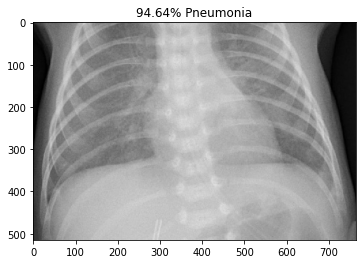

PNEUMONIA/person516_bacteria_2192.jpeg


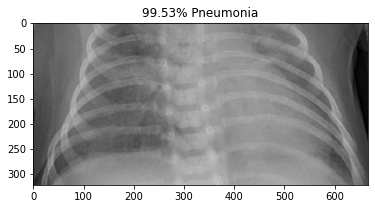

PNEUMONIA/person520_virus_1039.jpeg


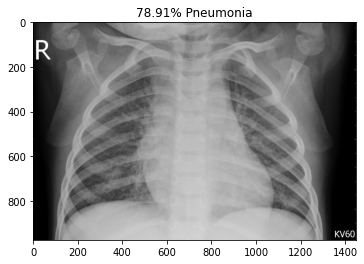

PNEUMONIA/person536_bacteria_2259.jpeg


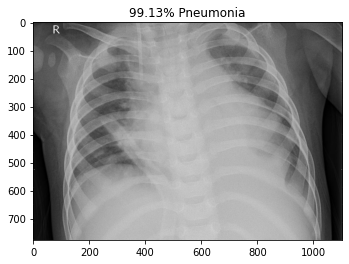

PNEUMONIA/person53_bacteria_253.jpeg


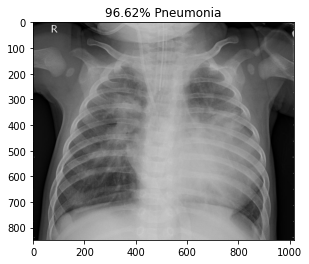

PNEUMONIA/person540_virus_1070.jpeg


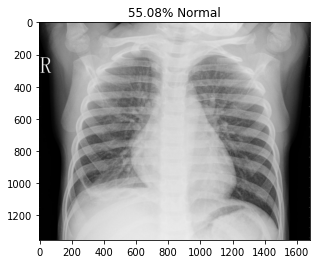

In [27]:

test_generator.reset() 
pred = model.predict_generator(test_generator,1000,verbose=1)
print("Predictions finished")
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
 image_path = test_dir + "/" +test_generator.filenames[index]
 image = mpimg.imread(image_path)
 #BGR TO RGB conversion using CV2
 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 pixels = np.array(image)
 plt.imshow(pixels)
 
 print(test_generator.filenames[index])
 if probability > 0.5:
   plt.title("%.2f" % (probability[0]*100) + "% Pneumonia")
 else:
   plt.title("%.2f" % ((1-probability[0])*100) + "% Normal")
 plt.show()

In [32]:
from tensorflow.keras import utils
img_path = '/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL/IM-0526-0001.jpeg'
from keras.preprocessing import image
import numpy as np
img = utils.load_img(img_path, target_size=(224, 224))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

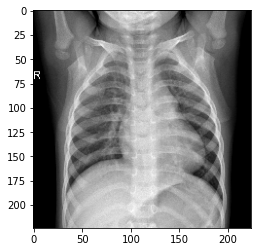

In [33]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [34]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [35]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 1s 563ms/step


In [36]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 222, 222, 32)


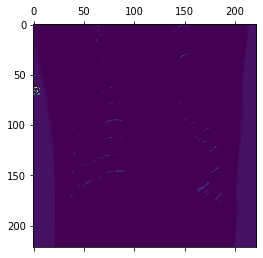

In [37]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

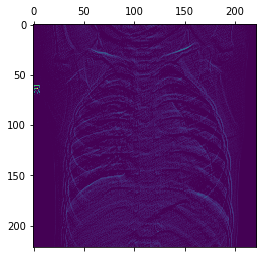

In [38]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

<ipython-input-39-67c32b21b77d>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


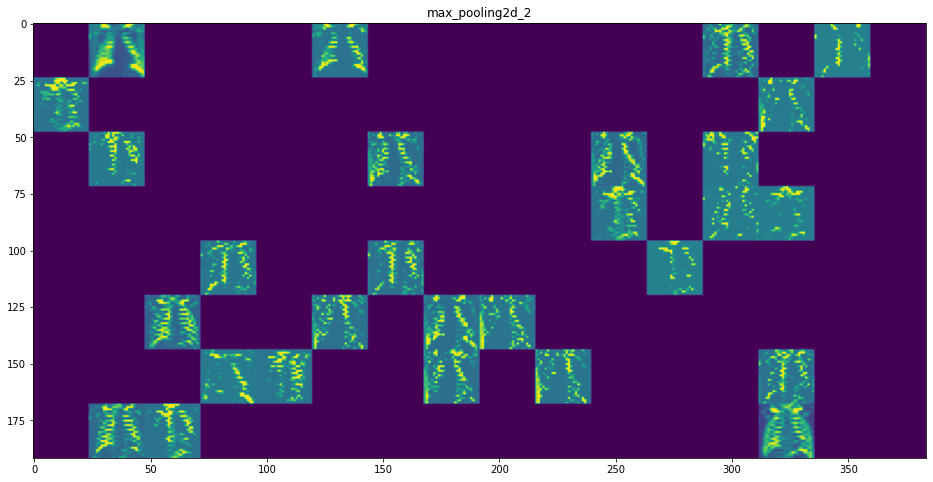

In [39]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,
                                       :, :,
                                       col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

**Mapa de calor**

In [40]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/radiografia/chest_x_ray/model_1.h")

In [41]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path ='/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL/IM-0526-0001.jpeg'
img = utils.load_img(img_path, target_size=(224, 224))
x = utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [42]:
preds = model.predict(x)

1/1 [==============================] - 0s 153ms/step


In [ ]:
print('Predicted:', decode_predictions(preds, top=3)[0])

In [44]:
np.argmax(preds[0])

0

In [46]:
african_e66lephant_output = model.output[:, 0]
last_conv_layer = model.get_layer('conv2d_3')

In [50]:
from tensorflow.keras import backend as K
grads = K.gradients(african_e66lephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

RuntimeError: ignored

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [ ]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('/Users/fchollet/Downloads/elephant_cam.jpg', superimposed_img)

_______________________________________________________________________________________________________
______________________________________________________________________________________________________
______________________________________________________________________________________________________

**Red preentrenada VGG16**

extraccion de caracteristicas sin aumento de datos

In [52]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [53]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#(preprocessing_function=preprocess_input)
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [56]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(224, 224),
      batch_size=batch_size,
      class_mode='binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 5212)
validation_features, validation_labels = extract_features(validation_images, 624)

In [ ]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))

In [ ]:
conv_base.trainable = False
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

extraccion de caracteristicas con aumento de datos

In [74]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [76]:

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [78]:
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [79]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_images,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 5212 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [82]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.legacy.RMSprop(learning_rate=0.0005), 
              metrics=['accuracy'])

In [83]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator)

Epoch 1/30
163/163 [==============================] - 135s 823ms/step - loss: 826.0775 - accuracy: 0.3676 - val_loss: 0.4633 - val_accuracy: 0.8333
Epoch 2/30
163/163 [==============================] - 132s 811ms/step - loss: 0.3364 - accuracy: 0.8691 - val_loss: 0.8436 - val_accuracy: 0.7051
Epoch 3/30
163/163 [==============================] - 128s 785ms/step - loss: 0.2550 - accuracy: 0.8987 - val_loss: 0.2714 - val_accuracy: 0.8862
Epoch 4/30
163/163 [==============================] - 129s 790ms/step - loss: 0.2173 - accuracy: 0.9175 - val_loss: 0.3785 - val_accuracy: 0.8622
Epoch 5/30
163/163 [==============================] - 131s 802ms/step - loss: 0.2054 - accuracy: 0.9196 - val_loss: 0.2363 - val_accuracy: 0.9087
Epoch 6/30
163/163 [==============================] - 129s 789ms/step - loss: 0.1847 - accuracy: 0.9304 - val_loss: 0.3274 - val_accuracy: 0.8558
Epoch 7/30
163/163 [==============================] - 127s 779ms/step - loss: 0.1869 - accuracy: 0.9313 - val_loss: 0.4207

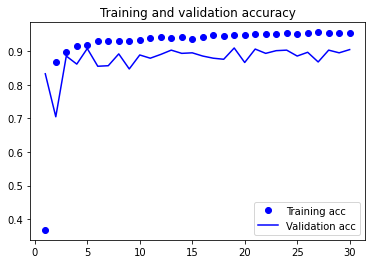

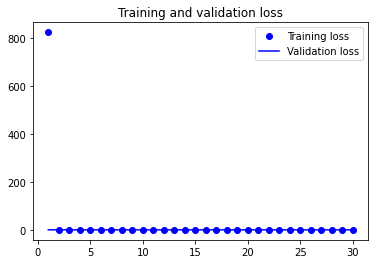

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

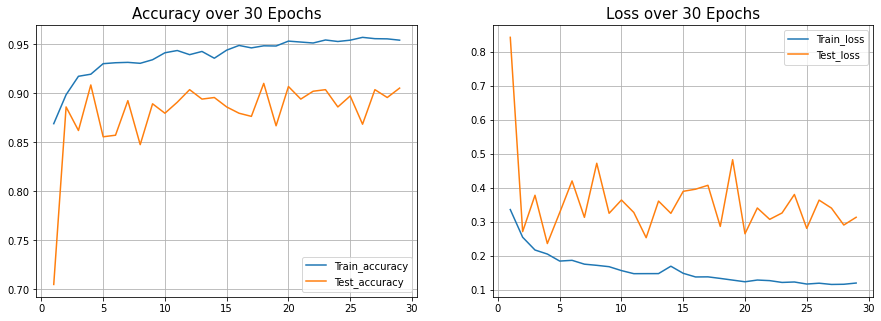

In [87]:
epoch=30
def plot_acc_loss(result, epochs):
 acc = result.history["accuracy"]
 loss = result.history["loss"]
 val_acc = result.history["val_accuracy"]
 val_loss = result.history["val_loss"]
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label="Train_accuracy")
 plt.plot(range(1,epochs), val_acc[1:], label="Test_accuracy")
 plt.title("Accuracy over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label="Train_loss")
 plt.plot(range(1,epochs), val_loss[1:], label="Test_loss")
 plt.title("Loss over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(history, 30)

Ajuste fino congelando las capas excepto la ultima 

In [88]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [89]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.legacy.RMSprop(learning_rate=0.0005), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator)

Epoch 1/30
163/163 [==============================] - 133s 807ms/step - loss: 10.1469 - accuracy: 0.8306 - val_loss: 0.3965 - val_accuracy: 0.8718
Epoch 2/30
163/163 [==============================] - 143s 878ms/step - loss: 0.2613 - accuracy: 0.9058 - val_loss: 0.5427 - val_accuracy: 0.7404
Epoch 3/30
163/163 [==============================] - 132s 809ms/step - loss: 0.2730 - accuracy: 0.9300 - val_loss: 0.3038 - val_accuracy: 0.8942
Epoch 4/30
163/163 [==============================] - 130s 797ms/step - loss: 0.1790 - accuracy: 0.9375 - val_loss: 0.3215 - val_accuracy: 0.8926
Epoch 5/30
120/163 [=====================>........] - ETA: 32s - loss: 0.2037 - accuracy: 0.9463

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def plot_acc_loss(result, epochs):
 acc = result.history["accuracy"]
 loss = result.history["loss"]
 val_acc = result.history["val_accuracy"]
 val_loss = result.history["val_loss"]
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label="Train_accuracy")
 plt.plot(range(1,epochs), val_acc[1:], label="Test_accuracy")
 plt.title("Accuracy over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label="Train_loss")
 plt.plot(range(1,epochs), val_loss[1:], label="Test_loss")
 plt.title("Loss over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(history, 30)

In [ ]:
model.save("/content/drive/MyDrive/radiografia/chest_x_ray/model_2.h")
model.save_weights("/content/drive/MyDrive/radiografia/chest_x_ray/pesos_2.h")

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=(224,224),
 batch_size=32,
 shuffle=False,
 seed=42,
 class_mode="binary")

test_generator.reset()
x = model.evaluate_generator(test_generator,
                             steps = np.ceil(len(test_generator) / 32),
                             use_multiprocessing = False,
                             verbose = 1,
                             workers=1)
print("Test loss:" , x[0])
print("Test accuracy:",x[1])

In [ ]:
test_generator.reset() 
pred = model.predict_generator(test_generator,1000,verbose=1)
print("Predictions finished")
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
 image_path = test_dir + "/" +test_generator.filenames[index]
 image = mpimg.imread(image_path)
 #BGR TO RGB conversion using CV2
 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 pixels = np.array(image)
 plt.imshow(pixels)
 
 print(test_generator.filenames[index])
 if probability > 0.5:
   plt.title("%.2f" % (probability[0]*100) + "% Pneumonia")
 else:
   plt.title("%.2f" % ((1-probability[0])*100) + "% Normal")
 plt.show()